# Importing Libraries

In [179]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Dropout , Flatten

# Imeges count from Folders

In [180]:
count = 0
dirs = os.listdir('Imeges/')
for dir in dirs:
    files = list(os.listdir('Imeges/'+ dir))
    print(dir+' Folders has '+ str(len(files))+ ' Images')
    count = count + len(files)
print('Images Folder has '+ str(count) + ' Images')

daisy Folders has 764 Images
dandelion Folders has 1052 Images
rose Folders has 784 Images
sunflower Folders has 733 Images
tulip Folders has 984 Images
Images Folder has 4317 Images


In [181]:
# Load Images into Array as Dataset

In [182]:
base_dir = 'Imeges/'
img_size = 180
batch = 32

In [183]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed=123,
                                                      validation_split=0.2,
                                                      subset='training',
                                                      batch_size=batch,
                                                      image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed=123,
                                                      validation_split=0.2,
                                                      subset='validation',
                                                      batch_size=batch,
                                                      image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [184]:
# flowers
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

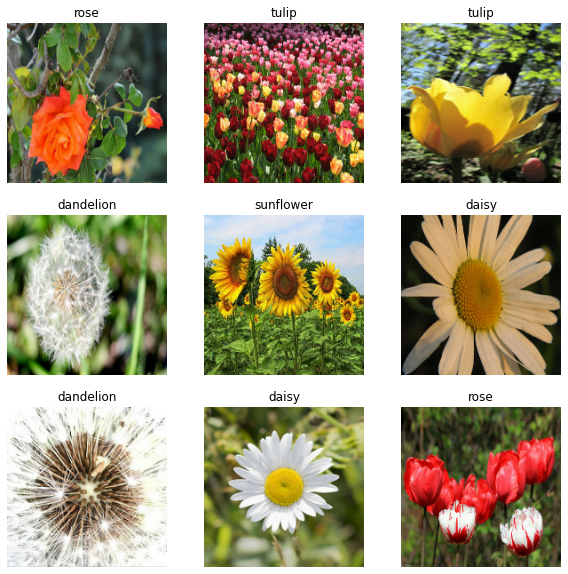

In [185]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [186]:
AUTOTUNE = tf.data.AUTOTUNE

In [187]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [188]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [189]:
# Data Augmentation
# variase possition on one image

In [190]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

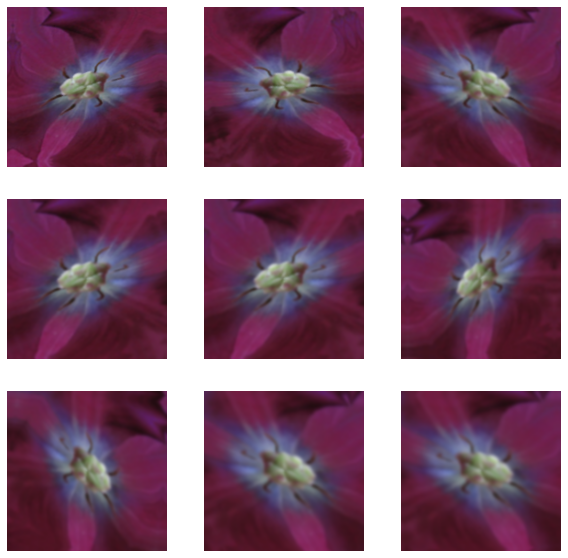

In [191]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
       
        plt.axis('off')

# Model Create 

In [192]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(5)
])


# Model Compile

In [193]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [194]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)           │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [195]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 194ms/step - accuracy: 0.3283 - loss: 1.6262 - val_accuracy: 0.5342 - val_loss: 1.1205
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.5623 - loss: 1.1197 - val_accuracy: 0.6257 - val_loss: 0.9771
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.6291 - loss: 0.9719 - val_accuracy: 0.6211 - val_loss: 0.9655
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.6468 - loss: 0.9337 - val_accuracy: 0.6605 - val_loss: 0.8821
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 0.6590 - loss: 0.8703 - val_accuracy: 0.6501 - val_loss: 0.8854
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.6950 - loss: 0.8106 - val_accuracy: 0.6628 - val_loss: 0.8832
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 171ms/step - accuracy: 0.6972 - loss: 0.7976 - val_accuracy: 0.6825 - val_loss: 0.8113
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.7178 - loss: 0

In [196]:
def predict_images(image_path):
    input_image = tf.keras.utils.load_img(image_path,target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_array_exp_dim = tf.expand_dims(input_image_array,0)
            
    prediction = model.predict(input_image_array_exp_dim)
    result = tf.nn.softmax(prediction[0])
    outcome = 'The Image Belongs to '+ flower_names[np.argmax(result)] + ' With a score of ' + str(np.max(result)*100)
    return outcome



In [197]:
predict_images('sample/download (4).jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


'The Image Belongs to tulip With a score of 97.73738384246826'

# Model save

In [200]:
model.save('flower_classification.keras')